# The Happiness Project


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import gmaps
import requests
import json

import statsmodels
import statsmodels.api as sm
from scipy.stats import linregress

# Import API key
# from api_keys import weather_api_key
# from api_keys import g_key

# Data Import and Cleaning

### 2021 Happiness Data

In [13]:
# Import World Happiness Report Data 2021
raw_happiness_df = pd.read_csv("Data/world-happiness-report-2021.csv")

# Using DataFrame.insert() to add a column
raw_happiness_df.insert(2, "Year", "2021")

# Rename columns
raw_happiness_df = raw_happiness_df.rename(columns={'Country name': 'Country', 
                                                'Regional indicator': 'Region',
                                                'Ladder score': 'Happiness Score',
                                                'Social support': 'Social Support',                                                    
                                                'Logged GDP per capita': 'GDP per Capita',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Freedom to make life choices': 'Freedom',
                                                'Perceptions of corruption': 'Corruption'})

# Drop columns not needed
happiness_df = raw_happiness_df.drop(columns=['Standard error of ladder score', 
                                              'upperwhisker', 
                                              'lowerwhisker',
                                              'Ladder score in Dystopia',
                                              'Explained by: Log GDP per capita',
                                              'Explained by: Social support',
                                              'Explained by: Healthy life expectancy',
                                              'Explained by: Freedom to make life choices',
                                              'Explained by: Generosity',
                                              'Explained by: Perceptions of corruption',
                                              'Dystopia + residual'])
# Show preview of DataFrame
happiness_df

,Country,Region,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,2021,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,2021,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,2021,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,2021,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,2021,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


### Historical happiness Data

In [14]:
# Import World Happiness Report Data 2005-2020
raw_happiness_time = pd.read_csv("Data/world-happiness-report.csv")

# Using DataFrame.insert() to add a column
raw_happiness_time.insert(2, "Region", "")

# Rename columns
raw_happiness_time = raw_happiness_time.rename(columns={'Country name': 'Country',
                                                'year' : 'Year',
                                                'Life Ladder': 'Happiness Score',
                                                'Social support': 'Social Support',  
                                                'Healthy life expectancy at birth': 'Life Expectancy',
                                                'Log GDP per capita': 'GDP per Capita',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Freedom to make life choices': 'Freedom',
                                                'Perceptions of corruption': 'Corruption'})

# Drop columns not needed
happiness_time = raw_happiness_time.drop(columns=['Positive affect', 
                                                   'Negative affect' 
                                                  ])
happiness_time

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,,3.783,7.705,0.521,52.24,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,,3.735,7.984,0.768,54.40,0.733,-0.095,0.724
1945,Zimbabwe,2017,,3.638,8.016,0.754,55.00,0.753,-0.098,0.751
1946,Zimbabwe,2018,,3.616,8.049,0.775,55.60,0.763,-0.068,0.844
1947,Zimbabwe,2019,,2.694,7.950,0.759,56.20,0.632,-0.064,0.831


In [15]:
# Add data from 2021 to our 2005-2020 DataFrame 
happiness_time_final = pd.concat([happiness_time, happiness_df])

# Convert Year column from string to int
happiness_time_final['Year'] = happiness_time_final['Year'].astype(int)

#  Sort DataFrame by Country and Year for more clarity
happiness_time_final = happiness_time_final.sort_values(['Country', 'Year']).reset_index()

# Add region names
for index, row in happiness_time_final.iterrows():
    
    country =  row['Country']
    if country in happiness_df['Country'].unique():
        row_index = happiness_df.index[happiness_df['Country'] == country][0]
        region = happiness_df.iloc[row_index, 1]
        happiness_time_final.iloc[index, 3] = region

# # # Show dataframe preview
happiness_time_final = happiness_time_final.drop("index", axis=1)
happiness_time_final

,Country,Year,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,South Asia,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,South Asia,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,South Asia,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,South Asia,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,South Asia,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,2017,Sub-Saharan Africa,3.638,8.016,0.754,55.000,0.753,-0.098,0.751
2094,Zimbabwe,2018,Sub-Saharan Africa,3.616,8.049,0.775,55.600,0.763,-0.068,0.844
2095,Zimbabwe,2019,Sub-Saharan Africa,2.694,7.950,0.759,56.200,0.632,-0.064,0.831
2096,Zimbabwe,2020,Sub-Saharan Africa,3.160,7.829,0.717,56.800,0.643,-0.009,0.789


### Country Data

In [16]:
# COUNTRY DATA

# Load country_data
country_data = pd.read_csv("Data/country_data.csv")

# Rename list for country_data.csv
rename_list = [["Hong Kong", "Hong Kong S.A.R. of China"], 
               ["Taiwan", "Taiwan Province of China", "Taiwan"], 
               ["Congo", "Congo (Brazzaville)", ], 
               ["Macedonia, the former Yugoslav Republic of", "North Macedonia"],  
               ["Palestinian Territory, Occupied", "Palestinian Territories"],
               ["Lao People's Democratic Republic", "Laos"],
               ["Iran, Islamic Republic of", "Iran"],
               ["Tanzania, United Republic of", "Tanzania"],
               ["Moldova, Republic of", "Moldova"]]

# Change the country names to match happiness_df
for item in range (len(rename_list)):
    index = country_data[country_data["Country"] == rename_list[item][0]].index
    country_data.loc[index, 'Country'] = rename_list[item][1]

# Merge with happienss data
country_df = pd.merge(happiness_df[["Country", "Region", "Happiness Score"]], country_data, how='left')
country_df

,Country,Region,Happiness Score,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),Population 2020,Med. Age,Urban Pop %
0,Finland,Western Europe,7.842,FI,FIN,246.0,64.0,26.00,5542237.0,43.0,86%
1,Denmark,Western Europe,7.620,DK,DNK,208.0,56.0,10.00,5795780.0,42.0,88%
2,Switzerland,Western Europe,7.571,CH,CHE,756.0,47.0,8.00,8665615.0,43.0,74%
3,Iceland,Western Europe,7.554,IS,ISL,352.0,65.0,-18.00,341628.0,37.0,94%
4,Netherlands,Western Europe,7.464,NL,NLD,528.0,52.5,5.75,17141544.0,43.0,92%
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,LS,LSO,426.0,-29.5,28.50,2145194.0,24.0,31%
145,Botswana,Sub-Saharan Africa,3.467,BW,BWA,72.0,-22.0,24.00,2359585.0,24.0,73%
146,Rwanda,Sub-Saharan Africa,3.415,RW,RWA,646.0,-2.0,30.00,13005303.0,20.0,18%
147,Zimbabwe,Sub-Saharan Africa,3.145,ZW,ZWE,716.0,-20.0,30.00,14899771.0,19.0,38%


### Weather Data

In [17]:
# Temp and weather data (1991-2016) accessed from World Bank Climate Knowledge Portal
# Availabile at: https://climateknowledgeportal.worldbank.org/download-data
# Sunlight data: World Cities Ranked by Annual Sunshine Hours. Dataset accessed from Kaggle

# TEMPERATURE DATA
# Temp data units = degrees Celsius
temp_data = pd.read_csv("Data/Temp_data.csv")

# Take the mean of each countries monthly average betweeb 1991-2016
temp_data = temp_data.groupby(['ISO3']).mean().reset_index()
# Change column name and drop unneccesary columns
temp_data = temp_data.rename(columns={"Temperature - (Celsius)":"Average Temp"})
temp_data = temp_data.drop(['Year'], axis=1)

# RAINFALL DATA
# Rainfall data units = mm
rainfall_data = pd.read_csv("Data/Rainfall_data.csv")

# Take the mean of each countries monthly average betweeb 1991-2016
rainfall_data = rainfall_data.groupby(['ISO3']).mean().reset_index()
# Change column name and drop unneccesary columns
rainfall_data = rainfall_data.rename(columns={"Rainfall - (MM)":"Average Rainfall"})
rainfall_data = rainfall_data.drop(['Year'], axis=1)

# Merge the temp and rainfall data into weather_data
weather_data = pd.merge(temp_data, rainfall_data, on="ISO3")
weather_data

# SUNLIGHT DATA
# Sunlight data units = annual sunlight hours
sun_data = pd.read_csv("Data/Sunlight_data.csv")
country_data = pd.read_csv("Data/country_data.csv")
sun_data = pd.merge(sun_data, country_data[['Country', "Alpha-3 code"]], on="Country")
sun_data = sun_data.drop(['Country'], axis=1)

# Add sunlight data to weather dataframe
weather_data = pd.merge(weather_data, sun_data, how="left", left_on="ISO3", right_on="Alpha-3 code")
weather_data = weather_data.drop(["Alpha-3 code"], axis=1)
weather_data

,ISO3,Average Temp,Average Rainfall,Sunlight
0,AFG,13.545609,26.843270,3175.100000
1,AGO,22.133815,80.567242,2341.000000
2,ALB,12.106435,82.681888,2544.000000
3,AND,11.953746,63.138190,NaN
4,ARE,27.557650,4.720581,3508.700000
...,...,...,...,...
191,WSM,27.589547,258.046617,NaN
192,YEM,23.936104,14.333849,NaN
193,ZAF,18.215114,38.303774,3141.316667
194,ZMB,22.451814,78.593516,2965.466667


### Mental Health Data

In [18]:
# MENTAL HEALTH DATA
# Source: WHO - Depression and Other Common Mental Disorders
# Availabile at: https://www.who.int/publications/i/item/depression-global-health-estimates

# Load data from mental_health.csv and conver rates to percentage
mental_health_data = pd.read_csv("Data/mental_health.csv", encoding='latin1')
mental_health_data['Depression rate'] = mental_health_data['Depression rate'] *100
mental_health_data['Anxiety rate'] = mental_health_data['Anxiety rate'] *100

# Merge with the country data
mental_health_data = pd.merge(happiness_df[['Country', 'Region', 'Happiness Score']], mental_health_data, on="Country", how="left")

# Display mental health data
mental_health_data


,Country,Region,Happiness Score,Depression rate,Anxiety rate
0,Finland,Western Europe,7.842,5.6,3.2
1,Denmark,Western Europe,7.620,5.0,4.9
2,Switzerland,Western Europe,7.571,5.0,4.9
3,Iceland,Western Europe,7.554,4.1,4.9
4,Netherlands,Western Europe,7.464,4.7,6.4
...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,4.8,3.1
145,Botswana,Sub-Saharan Africa,3.467,4.7,3.1
146,Rwanda,Sub-Saharan Africa,3.415,3.8,3.2
147,Zimbabwe,Sub-Saharan Africa,3.145,4.0,2.8


### COVID Data

In [19]:
# COVID DATA API REQUEST

# Load country_data.csv 
country_data = pd.read_csv("Data/country_data.csv")

# Create a dataframe to store the COVID data
covid_data = pd.DataFrame(columns={"Covid Cases", "Covid Deaths", "Covid Death Rate", "Covid Cases per Mil Pop", "Alpha-2 code"})
covid_data.insert(0, "Country", country_data["Country"])
covid_data
base_url = "http://corona-api.com/countries/"

# Use iterrows to iterate through the dataframe, adding each countires covid data
counter = 0
for index, row in country_data.iterrows():

    try:
        code = row["Alpha-2 code"]
    
        # call the COVID data API
        response = requests.get(base_url + code.lower()).json()
        
        # pull data from response
        covid_cases = response["data"]["latest_data"]["confirmed"]
        covid_deaths = response["data"]["latest_data"]["deaths"]
        covid_death_rate = response["data"]["latest_data"]["calculated"]["death_rate"]
        cases_per_mil_pop = response["data"]["latest_data"]["calculated"]["cases_per_million_population"]
    
        covid_data.loc[index, "Covid Cases"] = float(covid_cases)
        covid_data.loc[index, "Covid Deaths"] = float(covid_deaths)
        covid_data.loc[index, "Covid Cases per Mil Pop"] = float(cases_per_mil_pop)
        covid_data.loc[index, "Alpha-2 code"] = code
        
        if covid_death_rate != None:
            covid_data.loc[index, "Covid Death Rate"] = float(covid_death_rate)
        else:
            covid_data.loc[index, "Covid Death Rate"] = covid_death_rate

        counter += 1
        print(f"{round((counter/len(covid_data)*100),2)}% Done")
    
    except: 
        country = country_data.loc[index, "Country"]
        print(f"Error with country: {country}. No data found")
        
covid_data.to_csv("Data/covid_data.csv", index=False)
covid_data

0.39% Done
0.78% Done
1.17% Done
1.56% Done
1.95% Done
2.34% Done
2.73% Done
3.12% Done
3.52% Done
3.91% Done
4.3% Done
4.69% Done
5.08% Done
5.47% Done
5.86% Done
6.25% Done
6.64% Done
7.03% Done
7.42% Done
7.81% Done
8.2% Done
8.59% Done
8.98% Done
9.38% Done
9.77% Done
10.16% Done
10.55% Done
10.94% Done
11.33% Done
11.72% Done
12.11% Done
12.5% Done
12.89% Done
13.28% Done
13.67% Done
14.06% Done
14.45% Done
14.84% Done
15.23% Done
15.62% Done
16.02% Done
16.41% Done
16.8% Done
17.19% Done
17.58% Done
17.97% Done
18.36% Done
18.75% Done
19.14% Done
19.53% Done
19.92% Done
20.31% Done
20.7% Done
21.09% Done
21.48% Done
21.88% Done
22.27% Done
22.66% Done
23.05% Done
23.44% Done
23.83% Done
24.22% Done
24.61% Done
25.0% Done
25.39% Done
25.78% Done
26.17% Done
26.56% Done
26.95% Done
27.34% Done
27.73% Done
28.12% Done
28.52% Done
28.91% Done
29.3% Done
29.69% Done
30.08% Done
30.47% Done
30.86% Done
31.25% Done
31.64% Done
32.03% Done
32.42% Done
32.81% Done
33.2% Done
33.59% Done
3

,Country,Covid Deaths,Alpha-2 code,Covid Cases,Covid Death Rate,Covid Cases per Mil Pop
0,Afghanistan,2611,AF,59370,4.39784,1124
1,Albania,2383,AL,130736,1.82276,18
2,Algeria,3225,DZ,121344,2.65773,20
3,American Samoa,0,AS,0,None,0
4,Andorra,124,AD,13121,0.94505,24
...,...,...,...,...,...,...
251,Wallis and Futuna,5,WF,443,1.12867,3
252,Western Sahara,1,EH,10,10,0
253,Yemen,1207,YE,6220,19.4051,23
254,Zambia,1249,ZM,91418,1.36625,39


In [47]:
requests.get(base_url + code.lower()).json()


{'data': {'coordinates': {'latitude': 0, 'longitude': 0},
  'name': 'Zimbabwe',
  'code': 'ZW',
  'population': 13061000,
  'updated_at': '2021-04-28T08:10:57.855Z',
  'today': {'deaths': 0, 'confirmed': 0},
  'latest_data': {'deaths': 1565,
   'confirmed': 38164,
   'recovered': 35480,
   'critical': 1119,
   'calculated': {'death_rate': 4.100723194633686,
    'recovery_rate': 92.96719421444293,
    'recovered_vs_death_ratio': None,
    'cases_per_million_population': 12}},
  'timeline': [{'updated_at': '2021-04-28T04:20:32.000Z',
    'date': '2021-04-28',
    'deaths': 1565,
    'confirmed': 38164,
    'recovered': 35480,
    'new_confirmed': 62,
    'new_recovered': 331,
    'new_deaths': 5,
    'active': 1119},
   {'updated_at': '2021-04-27T04:20:52.000Z',
    'date': '2021-04-27',
    'deaths': 1560,
    'confirmed': 38102,
    'recovered': 35149,
    'new_confirmed': 16,
    'new_recovered': 26,
    'new_deaths': 3,
    'active': 1393},
   {'updated_at': '2021-04-26T04:21:04.000Z

In [20]:
# Pull data from covid_data.csv (to save repeating API call)
data = pd.read_csv("Data/covid_data.csv")
final_covid_data = pd.merge(country_df[["Country", "Happiness Score", "Alpha-2 code"]], data[["Covid Cases", "Covid Deaths", 
                                "Covid Death Rate", "Covid Cases per Mil Pop", "Alpha-2 code"]], how="left", on="Alpha-2 code")
final_covid_data

,Country,Happiness Score,Alpha-2 code,Covid Cases,Covid Deaths,Covid Death Rate,Covid Cases per Mil Pop
0,Finland,7.842,FI,86161.0,908.0,1.053841,32.0
1,Denmark,7.620,DK,248950.0,2479.0,0.995782,36.0
2,Switzerland,7.571,CH,653957.0,10587.0,1.618914,237.0
3,Iceland,7.554,IS,6447.0,29.0,0.449822,4.0
4,Netherlands,7.464,NL,1472674.0,17093.0,1.160678,814.0
...,...,...,...,...,...,...,...
156,Lesotho,3.512,LS,10728.0,316.0,2.945563,0.0
157,Botswana,3.467,BW,46600.0,702.0,1.506438,1.0
158,Rwanda,3.415,RW,24814.0,331.0,1.333924,4.0
159,Zimbabwe,3.145,ZW,38164.0,1565.0,4.100723,12.0


### Combined Data

In [21]:
happiness_df["Alpha-2 code"]= country_df["Alpha-2 code"]

final_df = pd.merge(happiness_df, country_df[["Alpha-2 code", "Alpha-3 code", "Numeric code", 
                                              "Latitude (average)", "Longitude (average)", "Population 2020",
                                              "Med. Age", "Urban Pop %"]], how='left', on="Alpha-2 code")

final_df = pd.merge(final_df, weather_data, left_on='Alpha-3 code', right_on="ISO3", how="left")
final_df = pd.merge(final_df, mental_health_data[["Country", "Depression rate", "Anxiety rate"]], how="left", on="Country")
final_df = pd.merge(final_df, final_covid_data[["Covid Cases", "Covid Deaths", "Covid Death Rate", "Covid Cases per Mil Pop", "Alpha-2 code"]], how="left", on="Alpha-2 code")


final_df.to_csv("Data/final_df.csv", index=False)
final_df

,Country,Region,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,...,ISO3,Average Temp,Average Rainfall,Sunlight,Depression rate,Anxiety rate,Covid Cases,Covid Deaths,Covid Death Rate,Covid Cases per Mil Pop
0,Finland,Western Europe,2021,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,...,FIN,2.402188,46.890103,1858.000000,5.6,3.2,86161.0,908.0,1.053841,32.0
1,Denmark,Western Europe,2021,7.620,10.933,0.954,72.700,0.946,0.030,0.179,...,DNK,8.678213,61.730040,1739.000000,5.0,4.9,248950.0,2479.0,0.995782,36.0
2,Switzerland,Western Europe,2021,7.571,11.117,0.942,74.400,0.919,0.025,0.292,...,CHE,6.713588,127.114978,1566.000000,5.0,4.9,653957.0,10587.0,1.618914,237.0
3,Iceland,Western Europe,2021,7.554,10.878,0.983,73.000,0.955,0.160,0.673,...,ISL,2.307253,92.339246,1326.000000,4.1,4.9,6447.0,29.0,0.449822,4.0
4,Netherlands,Western Europe,2021,7.464,10.932,0.942,72.400,0.913,0.175,0.338,...,NLD,10.316402,66.786411,1662.000000,4.7,6.4,1472674.0,17093.0,1.160678,814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Lesotho,Sub-Saharan Africa,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,...,LSO,13.468541,60.716254,NaN,4.8,3.1,10728.0,316.0,2.945563,0.0
205,Botswana,Sub-Saharan Africa,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,...,BWA,22.295602,31.477969,3426.666667,4.7,3.1,46600.0,702.0,1.506438,1.0
206,Rwanda,Sub-Saharan Africa,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167,...,RWA,20.012486,102.340034,NaN,3.8,3.2,24814.0,331.0,1.333924,4.0
207,Zimbabwe,Sub-Saharan Africa,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,...,ZWE,22.040161,51.957842,3065.400000,4.0,2.8,38164.0,1565.0,4.100723,12.0


In [22]:
final_df.columns

Index(['Country', 'Region', 'Year', 'Happiness Score', 'GDP per Capita',
       'Social Support', 'Life Expectancy', 'Freedom', 'Generosity',
       'Corruption', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code',
       'Latitude (average)', 'Longitude (average)', 'Population 2020',
       'Med. Age', 'Urban Pop %', 'ISO3', 'Average Temp', 'Average Rainfall',
       'Sunlight', 'Depression rate', 'Anxiety rate', 'Covid Cases',
       'Covid Deaths', 'Covid Death Rate', 'Covid Cases per Mil Pop'],
      dtype='object')

# Analysis

In [23]:
# Set variable holding happiness data in time, per country
happiness_map_time = happiness_time_final[['Year', 'Country', 'Happiness Score']]
happiness_map_time.sort_values(['Year'])

# Set happiness time map parameters
fig = px.choropleth(happiness_map_time, 
                     locations="Country", 
                     locationmode = "country names",
                     color = "Happiness Score",
                     hover_name = "Country",
                     color_continuous_scale = px.colors.sequential.Plasma,
                     animation_frame = "Year")
fig.update_xaxes(categoryorder="category ascending")

# Show map
fig.show()


In [24]:
# Global average scores per year
avg_scores = happiness_time_final.groupby(["Year"]).mean()
avg_scores

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
Year,,,,,,,
2005,6.446259,10.118667,0.897407,67.007407,0.829520,0.256000,0.715880
2006,5.196899,9.044284,0.835809,60.147500,0.730477,0.006654,0.755747
2007,5.418275,9.172951,0.807770,61.305267,0.687337,0.014833,0.792133
2008,5.418509,9.167273,0.784391,61.249954,0.688355,0.021486,0.764121
2009,5.457667,9.263805,0.819071,62.418928,0.687402,-0.005372,0.763387
2010,5.496806,9.393846,0.831867,63.069025,0.708262,0.003382,0.757235
2011,5.424082,9.286848,0.802800,62.212121,0.732186,-0.014438,0.755203
2012,5.443754,9.390593,0.809063,63.216993,0.711241,-0.002060,0.757955
2013,5.394562,9.373235,0.806555,63.326481,0.727897,-0.000158,0.763492


In [25]:
# Checking length of data for each year 
len_data_year = happiness_time_final.groupby(['Year']).count()

print("We have to take in consideration that not every year has the same amount of studied countries.")
print("This explains higher scores in 2005 (27 countries vs 149 in 2021). So, the year 2005 should not be considered as it is not representative enough.")

len_data_year

We have to take in consideration that not every year has the same amount of studied countries.
This explains higher scores in 2005 (27 countries vs 149 in 2021). So, the year 2005 should not be considered as it is not representative enough.


,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption
Year,,,,,,,,,
2005,27,27,27,27,27,27,25,1,25
2006,89,89,89,88,89,88,86,81,83
2007,102,102,102,102,100,101,101,102,98
2008,110,110,110,110,110,108,107,109,107
2009,114,114,114,113,113,111,112,113,111
2010,124,124,124,123,120,121,122,123,119
2011,146,146,146,145,145,141,145,144,138
2012,142,142,142,140,142,136,141,133,132
2013,137,137,137,136,137,133,136,133,130


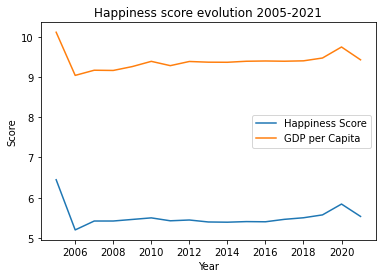

Money can not buy happiness... Really?


In [26]:
# Plot line for Happiness and GDP per Capita scores 2005-2021
plt.plot(avg_scores.index, avg_scores['Happiness Score'])
plt.plot(avg_scores.index, avg_scores['GDP per Capita'])
plt.legend(('Happiness Score','GDP per Capita'))
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Happiness score evolution 2005-2021')
plt.show()

print("Money can not buy happiness... Really?")



In [27]:
# WEATHER AND HAPPINESS

weather_and_happiness = pd.merge(country_df, weather_data, how="left", left_on="Alpha-3 code", right_on="ISO3")
weather_and_happiness

# Scatter plot with linear regression
fig = px.scatter(weather_and_happiness, x="Happiness Score", y="Average Temp",  
                 hover_name="Country", trendline="ols",range_y=(-10,35),
                 width=800, height=600)
                 

# Get results from linear regression 
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = results.rsquared

# Create text for regression paramaters
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha) 
line2 = 'r<sup>2</sup> = ' + str(round(r_squared, 3))
summary = line1 + '<br>' + line2 

# Add to the plot
fig.add_annotation(x=3.5, y=2, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

# Format titles and axes
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), title_font_family="Arial", 
                  title={'text': "Happiness vs Average Temperature", 'y':1, 'x':0.55, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title="Happiness Score", showgrid=True)
fig.update_yaxes(title="Average Temp 1991-2016 (deg Celsius)", showgrid=True)
fig.update_traces(marker=dict(size=10, opacity=0.8), selector=dict(mode='markers')) # formatting of dots
fig.show()

In [28]:
# WEATHER AND HAPPINESS

weather_and_happiness = pd.merge(country_df, weather_data, how="left", left_on="Alpha-3 code", right_on="ISO3")

# Scatter plot with linear regression
fig = px.scatter(weather_and_happiness, x="Happiness Score", y="Average Temp",  
                 hover_name="Country", color="Region", range_y=(-10,35),
                 width=1000, height=600)
                 



# Format titles and axes
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), title_font_family="Arial", 
                  title={'text': "Happiness vs Average Temperature", 'y':1, 'x':0.4, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title="Happiness Score", showgrid=True)
fig.update_yaxes(title="Average Temp 1991-2016 (deg Celsius)", showgrid=True)
fig.update_traces(marker=dict(size=10, opacity=0.8), selector=dict(mode='markers')) # formatting of dots

# LINEAR REGRESSION
# Set the x and y params for linear regression calculation
y = weather_and_happiness["Average Temp"]
x = sm.add_constant(weather_and_happiness["Happiness Score"])

# Create the linear regression model and get values for regression line
model = sm.OLS(y, x, missing='drop')
results = model.fit()
reg_line = [(x*results.params[1])+results.params[0] for x in weather_and_happiness["Happiness Score"]]

# Create text for regression paramaters
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = round(results.rsquared, 3)
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha)
line2 = 'r<sup>2</sup> = ' + str(r_squared)
summary = line1 + '<br>' + line2 

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=weather_and_happiness["Happiness Score"], y=reg_line,
                          mode = 'lines',
                          marker_color='gray',
                          name='Regression line',
                          opacity=0.8,
                          showlegend=False)
               )
# Add to the equation and r squared 
fig.add_annotation(x=3.5, y=2, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

fig

In [29]:
# Country's Happiness and Mental Health

fig = px.scatter(mental_health_data, x="Happiness Score", y="Depression rate",  
                 hover_name="Country", color="Region", range_y=(2.5,7),
                 size="Happiness Score", size_max=10,
                 width=1000, height=600)
fig

# LINEAR REGRESSION
# Set the x and y params for linear regression calculation
y = mental_health_data["Depression rate"]
x = sm.add_constant(mental_health_data["Happiness Score"])

# Create the linear regression model and get values for regression line
model = sm.OLS(y, x, missing='drop')
results = model.fit()
reg_line = [(x*results.params[1])+results.params[0] for x in mental_health_data["Happiness Score"]]

# Create text for regression paramaters
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = round(results.rsquared, 3)
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha)
line2 = 'r<sup>2</sup> = ' + str(r_squared)
summary = line1 + '<br>' + line2 

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=mental_health_data["Happiness Score"], y=reg_line,
                          mode = 'lines',
                          marker_color='gray',
                          name='Regression line',
                          opacity=0.8,
                          showlegend=False)
               )
# Add to the equation and r squared 
fig.add_annotation(x=3.5, y=6, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

In [30]:
# Select data for happiness map from happiness_df
happiness_map_data = happiness_df[['Country', 'Happiness Score']]

# Set happiness map parameters
fig = px.choropleth(happiness_map_data, 
                     locations="Country", 
                     locationmode = "country names",
                     color = "Happiness Score",
                     hover_name = "Country",
                     color_continuous_scale = px.colors.sequential.Plasma)

# Show map
fig.show()

In [43]:
# Covid and happiness

# Scatter plot with linear regression
fig = px.scatter(final_df, x="Happiness Score", y="Covid Cases per Mil Pop",  
                 hover_name="Country", trendline="ols",range_y=(-10,70),
                 width=800, height=600)
                 

# Get results from linear regression 
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = results.rsquared

# Create text for regression paramaters
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha) 
line2 = 'r<sup>2</sup> = ' + str(round(r_squared, 3))
summary = line1 + '<br>' + line2 

# Add to the plot
fig.add_annotation(x=3.5, y=2, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

# Format titles and axes
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), title_font_family="Arial", 
                  title={'text': "Happiness vs Covid Cases per Mil pop", 'y':1, 'x':0.55, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title="Happiness Score", showgrid=True)
fig.update_yaxes(title="Covid Cases per Mil Pop", showgrid=True)
fig.update_traces(marker=dict(size=10, opacity=0.8), selector=dict(mode='markers')) # formatting of dots
fig.show()

In [41]:
# Covid and happiness

# Scatter plot with linear regression
fig = px.scatter(final_df, x="Happiness Score", y="Covid Death Rate",  
                 hover_name="Country", trendline="ols",range_y=(-10,20),
                 width=800, height=600)
                 

# Get results from linear regression 
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = results.rsquared

# Create text for regression paramaters
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha) 
line2 = 'r<sup>2</sup> = ' + str(round(r_squared, 3))
summary = line1 + '<br>' + line2 

# Add to the plot
fig.add_annotation(x=3.5, y=2, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

# Format titles and axes
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), title_font_family="Arial", 
                  title={'text': "Happiness vs Covid Death Rate", 'y':1, 'x':0.55, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title="Happiness Score", showgrid=True)
fig.update_yaxes(title="Covid Death Rate", showgrid=True)
fig.update_traces(marker=dict(size=10, opacity=0.8), selector=dict(mode='markers')) # formatting of dots
fig.show()

In [40]:
# Country's Happiness and Covid death rate

fig = px.scatter(final_df, x="Happiness Score", y="Covid Death Rate",  
                 hover_name="Country", color="Region", range_y=(-1,7),
                 size="Happiness Score", size_max=10,
                 width=1000, height=600)
fig

# LINEAR REGRESSION
# Set the x and y params for linear regression calculation
y = final_df["Covid Death Rate"]
x = sm.add_constant(final_df["Happiness Score"])

# Create the linear regression model and get values for regression line
model = sm.OLS(y, x, missing='drop')
results = model.fit()
reg_line = [(x*results.params[1])+results.params[0] for x in final_df["Happiness Score"]]

# Create text for regression paramaters
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = round(results.rsquared, 3)
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha)
line2 = 'r<sup>2</sup> = ' + str(r_squared)
summary = line1 + '<br>' + line2 

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=final_df["Happiness Score"], y=reg_line,
                          mode = 'lines',
                          marker_color='gray',
                          name='Regression line',
                          opacity=0.8,
                          showlegend=False)
               )
# Add to the equation and r squared 
fig.add_annotation(x=3.5, y=6, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

In [50]:
# Covid and depression

# Scatter plot with linear regression
fig = px.scatter(final_df, x="Depression rate", y="Covid Death Rate",  
                 hover_name="Country", trendline="ols",range_y=(-10,10),
                 width=800, height=600)
                 

# Get results from linear regression 
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = results.rsquared

# Create text for regression paramaters
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha) 
line2 = 'r<sup>2</sup> = ' + str(round(r_squared, 3))
summary = line1 + '<br>' + line2 

# Add to the plot
fig.add_annotation(x=3.5, y=2, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

# Format titles and axes
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), title_font_family="Arial", 
                  title={'text': "Depression rate vs Covid Death Rate", 'y':1, 'x':0.55, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(title="Depression rate", showgrid=True)
fig.update_yaxes(title="Covid Death Rate", showgrid=True)
fig.update_traces(marker=dict(size=10, opacity=0.8), selector=dict(mode='markers')) # formatting of dots
fig.show()

In [51]:
# Covid death and GDP per Capita

fig = px.scatter(final_df, x="GDP per Capita", y="Covid Death Rate",  
                 hover_name="Country", color="Region", range_y=(-1,7),
                 size="Happiness Score", size_max=10,
                 width=1000, height=600)
fig

# LINEAR REGRESSION
# Set the x and y params for linear regression calculation
y = final_df["Covid Death Rate"]
x = sm.add_constant(final_df["GDP per Capita"])

# Create the linear regression model and get values for regression line
model = sm.OLS(y, x, missing='drop')
results = model.fit()
reg_line = [(x*results.params[1])+results.params[0] for x in final_df["GDP per Capita"]]

# Create text for regression paramaters
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = round(results.rsquared, 3)
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha)
line2 = 'r<sup>2</sup> = ' + str(r_squared)
summary = line1 + '<br>' + line2 

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=final_df["GDP per Capita"], y=reg_line,
                          mode = 'lines',
                          marker_color='gray',
                          name='Regression line',
                          opacity=0.8,
                          showlegend=False)
               )
# Add to the equation and r squared 
fig.add_annotation(x=3.5, y=6, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

In [61]:
# Covid numbers and Average Temp just for fun

fig = px.scatter(final_df, x="Average Temp", y="Covid Cases",  
                 hover_name="Country", color="Region", range_y=(-50000,500000), range_x=(-5,30),
                 size="Happiness Score", size_max=10,
                 width=1000, height=600)
fig

# LINEAR REGRESSION
# Set the x and y params for linear regression calculation
y = final_df["Covid Cases"]
x = sm.add_constant(final_df["Average Temp"])

# Create the linear regression model and get values for regression line
model = sm.OLS(y, x, missing='drop')
results = model.fit()
reg_line = [(x*results.params[1])+results.params[0] for x in final_df["Average Temp"]]

# Create text for regression paramaters
alpha = round(results.params[0],1)
beta = round(results.params[1],1)
r_squared = round(results.rsquared, 3)
line1 = 'y = ' + str(beta) + 'x' + ' + ' + str(alpha)
line2 = 'r<sup>2</sup> = ' + str(r_squared)
summary = line1 + '<br>' + line2 

# add linear regression line for whole sample
fig.add_traces(go.Scatter(x=final_df["Average Temp"], y=reg_line,
                          mode = 'lines',
                          marker_color='gray',
                          name='Regression line',
                          opacity=0.8,
                          showlegend=False)
               )
# Add to the equation and r squared 
fig.add_annotation(x=3.5, y=6, xref="x", yref="y", text=summary,
                   font=dict(family="Courier New, monospace", size=18, color="#ffffff"),
                   showarrow=False, align="left",
                   borderwidth=2, borderpad=4, bgcolor="rgba(100,100,100, 0.6)",
                   opacity=0.8)

### Things to consider;
Correlation / Causation. What makes us Happy vs. What can result from Happiness..

The r-value is 0.7897596965098939


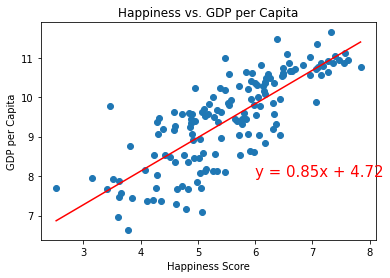

In [21]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['GDP per Capita']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,8),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')          

# Save plotted figure as .png
plt.savefig("images/Happiness_GDP_per_capita.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is 0.7568876453635003


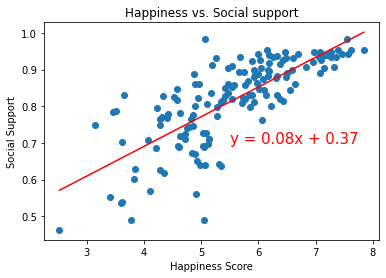

In [22]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Social Support']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.7),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Social support')
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')

# Save plotted figure as .png
plt.savefig("images/Happiness_Social_Support.png")
           
# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is 0.7680994550105208


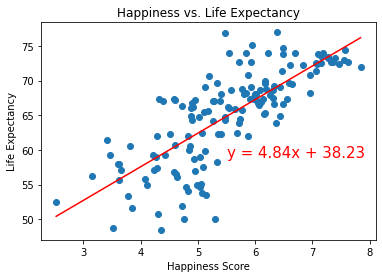

In [23]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Life Expectancy']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.5,59),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Life Expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Life_Expectancy.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is 0.6077530656580243


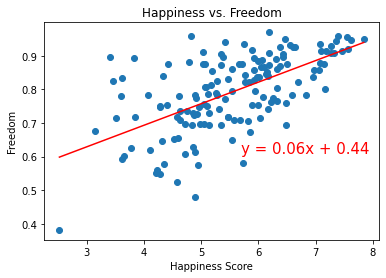

In [24]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Freedom']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.7,0.61),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Freedom.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is -0.017799276922640755


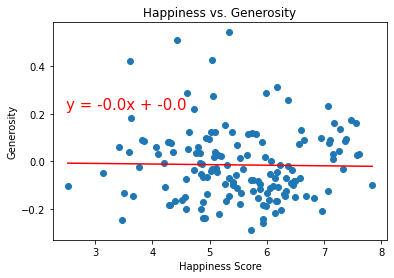

In [25]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Generosity']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2.5,0.22),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Generosity.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is -0.4211399967385787


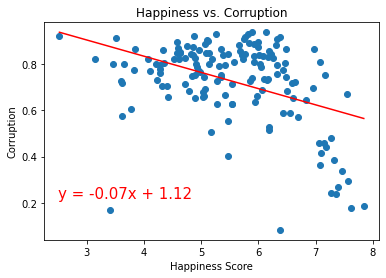

In [26]:
# Set values for x and y axis
x_axis = happiness_df['Happiness Score']
y_axis = happiness_df['Corruption']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2.5,0.22),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. Corruption')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')          

# Save plotted figure as .png
plt.savefig("images/Happiness_Corruption.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

In [27]:
# Read in GDP per Capita .csv file
GDP_per_capita_df = pd.read_csv("Data/World_GDP_per_capita_1960-2019.csv")

# Reduce dataframe to only show 2019 GDP per Capita
GDP_per_capita_2019_df = GDP_per_capita_df[['Country Name', '2019']]

# Rename columns
GDP_per_capita_2019_df = GDP_per_capita_2019_df.rename(columns={'Country Name': 'Country',
                                                                '2019': '2019 GDP per Capita'})

# GDP_per_capita_df = GDP_per_capita_df.dropna()

# Show dataframe preview
GDP_per_capita_2019_df.head()

,Country,2019 GDP per Capita
0,Aruba,NaN
1,Afghanistan,507.103432
2,Angola,2790.726615
3,Albania,5353.244856
4,Andorra,40886.391160


In [28]:
# Read in GDP .csv file
GDP_df = pd.read_csv("Data/World_GDP_1960-2019.csv")

# Reduce dataframe to only show 2019 GDP per Capita
GDP_2019_df = GDP_df[['Country Name', '2019']]

# Rename columns
GDP_2019_df = GDP_2019_df.rename(columns={'Country Name': 'Country',
                                          '2019': '2019 GDP'})

# GDP_2019_df = GDP_2019_df.dropna()

# Show dataframe preview
GDP_2019_df.head()

,Country,2019 GDP
0,Aruba,NaN
1,Afghanistan,1.929110e+10
2,Angola,8.881570e+10
3,Albania,1.527918e+10
4,Andorra,3.154058e+09


In [29]:
# Merge happiness, 2019 GDP per Capita and 2019 GDP dataframes
happiness_GDP_2019_df = pd.merge(happiness_df, GDP_per_capita_2019_df, how='inner', on="Country") 
happiness_GDP_2019_df = pd.merge(happiness_GDP_2019_df, GDP_2019_df, how='inner', on="Country") 

# Show dataframe preview
happiness_GDP_2019_df.head()

,Country,Region,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Alpha-2 code,2019 GDP per Capita,2019 GDP
0,Finland,Western Europe,2021,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,FI,48782.78848,2.692960e+11
1,Denmark,Western Europe,2021,7.620,10.933,0.954,72.7,0.946,0.030,0.179,DK,60170.34264,3.501040e+11
2,Switzerland,Western Europe,2021,7.571,11.117,0.942,74.4,0.919,0.025,0.292,CH,81993.72713,7.030820e+11
3,Iceland,Western Europe,2021,7.554,10.878,0.983,73.0,0.955,0.160,0.673,IS,66944.83308,2.418804e+10
4,Netherlands,Western Europe,2021,7.464,10.932,0.942,72.4,0.913,0.175,0.338,NL,52331.31673,9.070510e+11


The r-value is nan


c:\users\facci\anaconda3\envs\pythondata\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



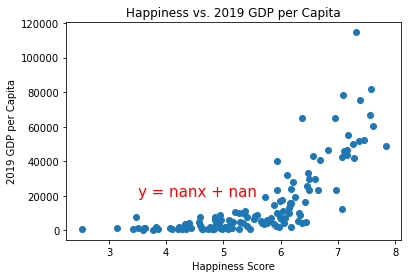

In [30]:
# Set values for x and y axis
x_axis = happiness_GDP_2019_df['Happiness Score']
y_axis = happiness_GDP_2019_df['2019 GDP per Capita']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3.5,20000),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP per Capita')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP_per_Capita.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

c:\users\facci\anaconda3\envs\pythondata\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



The r-value is nan


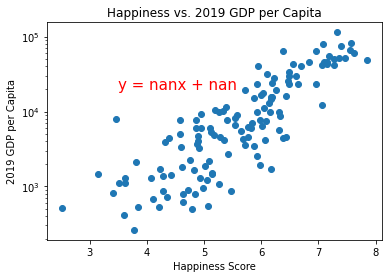

In [31]:
# Cr-create previous plot but with a logarithmic scale on the y-axis
fig = plt.scatter(x_axis, y_axis)
ax = plt.gca()
ax.set_yscale('log')

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3.5,20000),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP per Capita')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP_per_Capita.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()

The r-value is nan


c:\users\facci\anaconda3\envs\pythondata\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



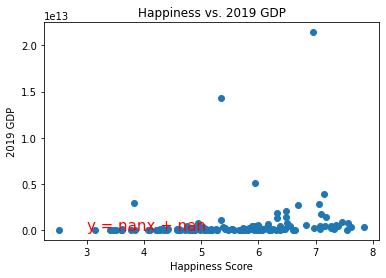

In [32]:
# Set values for x and y axis
x_axis = happiness_GDP_2019_df['Happiness Score']
y_axis = happiness_GDP_2019_df['2019 GDP']

# Create line plot
plt.scatter(x_axis, y_axis)

# Create linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(3,0.5),fontsize=15,color="red")

# Add title and labels to line plot
plt.title('Happiness vs. 2019 GDP')
plt.xlabel('Happiness Score')
plt.ylabel('2019 GDP')          

# Save plotted figure as .png
plt.savefig("images/Happiness_2019_GDP.png")

# Show line plot
print(f"The r-value is {rvalue}")
plt.show()